## We try to use neural network approach for atomic coordinate prediction

#### Density functional theory that is the most successful method calculates atomic coordinates faster than other mathematical approaches, and it also reaches more accurate results. However, the elapsed time for calculation of high number atoms is quite long which is yielded in this study using CASTEP. Calculation may take several days due to computer’s power. On the other hand, users need to use more powerful machines and parallel computers which are too expensive to reduce the calculation time. Using of maching learning method can degrees the calculation time for atomic coordinates from days to minutes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error 
from math import sqrt

#### Load data and take information about coordinates

In [2]:
nano=pd.read_csv('./carbon_nanotubes.csv', sep=';')
nano.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


#### Replace comma to point and change the object type to float 

In [3]:
for c in nano.columns:
    if c != 'Chiral indice n' and c!= 'Chiral indice m':
        nano[c] = [x.replace(',', '.') for x in nano[c]]
        nano[c] = nano[c].astype('float64') 

In [4]:
nano.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373


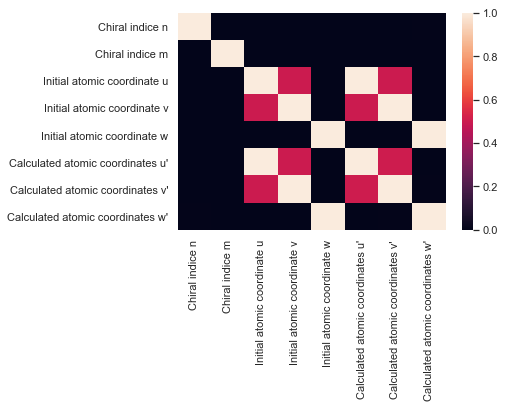

In [8]:
sns.heatmap(nano.corr())

#### There are clear see that our output data have a strong correlation between  appropriate axes(coordinates)

#### To understand how many types of nanotubes coexist in this data base we create a diagram to determine couple of  the chiral indices which corresponds conductor and semiconductor

C:\Users\laureate2033\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


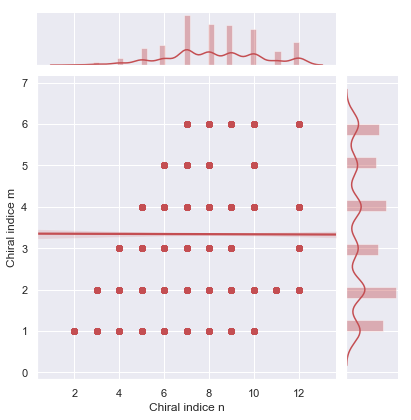

In [5]:
sns.set(style="darkgrid")
sns.jointplot("Chiral indice n","Chiral indice m", data=nano, kind="reg", color="r")

#### How we can see our data base contains just chiral type of nanotubes (without arcmchair(n!=m) and zigzag types (m!=0))

#### Create plots of changing coordination to try to understand how out coordinate dependent on input ones

In [6]:
nano_u=nano["Calculated atomic coordinates u'"]-nano["Initial atomic coordinate u"]
nano_v=nano["Calculated atomic coordinates v'"]-nano["Initial atomic coordinate v"]
nano_w=nano["Calculated atomic coordinates w'"]-nano["Initial atomic coordinate w"]

Text(0.5,1,'w')

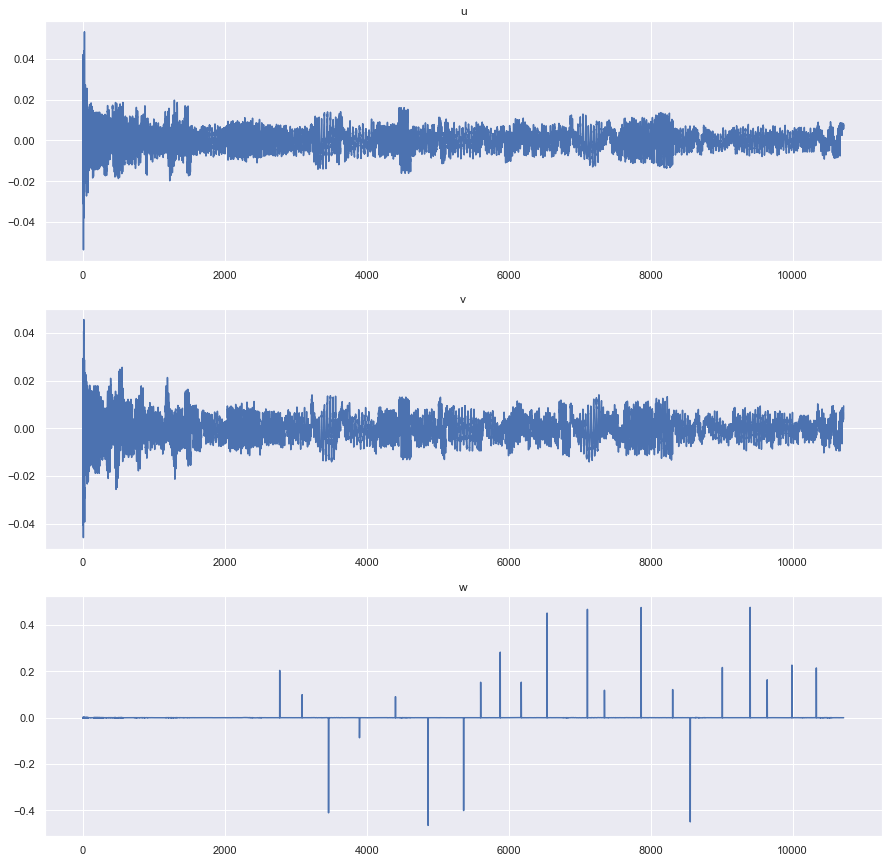

In [7]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(311)
ax1.plot(range(10721), nano_u)
ax1.set_title('u')

ax2 = fig.add_subplot(312)
ax2.plot(range(10721), nano_v)
ax2.set_title('v')

ax3 = fig.add_subplot(313)
ax3.plot(range(10721), nano_w)
ax3.set_title('w')


#### Unfortunately, this task doesn't have some features, which we can use to generate a new specific features and according to the article "Acı M., Avcı M. Artificial neural network approach for atomic coordinate prediction of carbon nanotubes //Applied Physics A. – 2016. – Т. 122. – №. 7. – С. 631." we need to use neural network to predict output data using of input data(u,v,w coordinates)

#### It means we have influence between u, v coordinate
#### See a heatmap to understand other correlations between parametres

#### Create our target and X

In [10]:
nano_copy = nano.copy()

In [11]:
from sklearn.model_selection import train_test_split
X_nano = nano_copy.drop("Calculated atomic coordinates u'", axis=1)
X_nano = X_nano.drop("Calculated atomic coordinates v'", axis=1)
X_nano = X_nano.drop("Calculated atomic coordinates w'",axis=1)
Y_nano = nano_copy.loc[ :, "Calculated atomic coordinates u'":"Calculated atomic coordinates w'"]

#### Normalize our data

#### if we use data normalization we need to take sqrt of dispersion and standard deviation equals to 1, average value is approximately 0

#### Using crossvalidation to prepare our train and test data

In [12]:
from sklearn.preprocessing import StandardScaler
#Y_nano = Y_nano.loc[ : , :]
scaled = StandardScaler().fit_transform(Y_nano.values)
Y_nano_scaled = pd.DataFrame(scaled, index=Y_nano.index, columns=Y_nano.columns)
Y_nano_scaled.head() 

,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,0.759569,0.790933,-1.670188
1,0.819293,0.538416,-0.925224
2,-0.076956,-0.813926,-1.422167
3,-0.313629,0.542357,-1.591379
4,-0.676180,0.201840,-1.184653


In [30]:
from sklearn.preprocessing import StandardScaler
#X_nano = X_nano.loc[ : , "Initial atomic coordinate u'": ]
scaled = StandardScaler().fit_transform(X_nano.values)
X_nano_scaled = pd.DataFrame(scaled, index=X_nano.index, columns=X_nano.columns)
X_nano_scaled.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w
0,-2.910823,-1.388042,0.624554,0.702474,-1.672867
1,-2.910823,-1.388042,0.758206,0.495867,-0.930080
2,-2.910823,-1.388042,-0.037442,-0.685282,-1.425270
3,-2.910823,-1.388042,-0.300535,0.463987,-1.590333
4,-2.910823,-1.388042,-0.578588,0.151245,-1.177677


In [13]:
for column in Y_nano_scaled.columns:
    column = str(column)
    print (np.sqrt(Y_nano_scaled[column].var()), '\t', Y_nano_scaled[column].std(), 
               '\t', Y_nano_scaled[column].mean(), '\t', column)

1.0000466407033666 	 1.0000466407033666 	 1.315367303310208e-16 	 Calculated atomic coordinates u'
1.0000466407033657 	 1.0000466407033657 	 -2.3261766441707764e-16 	 Calculated atomic coordinates v'
1.0000466407033661 	 1.0000466407033661 	 -8.199557792166766e-17 	 Calculated atomic coordinates w'


In [31]:
for column in X_nano_scaled.columns:
    column = str(column)
    print (np.sqrt(X_nano_scaled[column].var()), '\t', X_nano_scaled[column].std(), 
               '\t', X_nano_scaled[column].mean(), '\t', column)

1.000046640703461 	 1.000046640703461 	 -1.08191497817319e-14 	 Chiral indice n
1.000046640703418 	 1.000046640703418 	 -9.230146313859664e-16 	 Chiral indice m
1.000046640703369 	 1.000046640703369 	 -1.3041832638866916e-16 	 Initial atomic coordinate u
1.0000466407033657 	 1.0000466407033657 	 -3.2265953736844165e-16 	 Initial atomic coordinate v
1.00004664070337 	 1.00004664070337 	 -4.3265663621713495e-17 	 Initial atomic coordinate w


In [14]:
Y_nano_scaled

,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,0.759569,0.790933,-1.670188
1,0.819293,0.538416,-0.925224
2,-0.076956,-0.813926,-1.422167
3,-0.313629,0.542357,-1.591379
4,-0.676180,0.201840,-1.184653
5,-0.010612,0.775042,-0.843582
6,-0.375312,0.541491,-0.432746
7,0.859311,0.211074,-1.331425
8,-0.751967,-0.820070,-1.096767
9,-0.512868,-0.916060,-0.683675


#### Do our target one-dimension 

In [41]:
from sklearn.decomposition import PCA
Y_nano_scaled_PCA = Y_nano_scaled.loc[ : , :]
pca = PCA(n_components=1)
pca. fit(Y_nano_scaled_PCA) 
data_pca = pca. transform(Y_nano_scaled_PCA)
print("input array: {}" . format(str(Y_nano_scaled_PCA. shape)))
print("output array: {}" . format(str(data_pca. shape)))

input array: (10721, 3)
output array: (10721, 1)


In [32]:
Y_nano = pd.DataFrame(data_pca)

#### Separate our date to test and train

In [33]:
X_nano_train, X_nano_test,Y_nano_train, Y_nano_test= train_test_split(X_nano, Y_nano, test_size=0.3)

In [19]:
Y_nano_test.describe()

,0
count,3217.000000
mean,-0.000691
std,1.215004
min,-1.918702
25%,-1.178540
50%,0.005153
75%,1.172867
max,1.927147


#### import neupy

In [21]:
from numpy import dot
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from neupy import algorithms, estimators, environment

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\laureate2033\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Use GRNN to train and predict target

In [44]:
nw = algorithms.GRNN(std=0.1, verbose=False)
nw.train(X_nano_train, Y_nano_train)

y_predicted = nw.predict(X_nano_test)
error=estimators.rmse(y_predicted, Y_nano_test)
print('The error is', error)

The error is 0.08860464268593507


#### we tried to use another method of neural network, for example, FFNN, FITNET, CFNN, unfortunately, we had some problems with using it to solve the task with carbon nanotubes


#### GRNN model is proposed to predict the atomic coordinates of carbon nanotubes. The predicted atomic coordinates can be used instead of simulated ones, or they can be the initial values of the simulation. The use of neural network ensures that the exact results of atomic coordinates can be obtained in a short time.